<a href="https://colab.research.google.com/github/HatemGamal/ElectroPi/blob/main/AirbnbDataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/HatemGamal/ElectroPi/f18ea1b17f47715c507f2b1c1c64ec93eeab4e8d/sample_data/AirbnbTexas.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14694 entries, 0 to 14693
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14694 non-null  int64  
 1   name                            14694 non-null  object 
 2   host_id                         14694 non-null  int64  
 3   host_name                       14692 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   14694 non-null  int64  
 6   latitude                        14694 non-null  float64
 7   longitude                       14694 non-null  float64
 8   room_type                       14694 non-null  object 
 9   price                           14694 non-null  int64  
 10  minimum_nights                  14694 non-null  int64  
 11  number_of_reviews               14694 non-null  int64  
 12  last_review                     

In [3]:
df.shape

(14694, 18)

In [4]:
df.isnull().sum()

id                                    0
name                                  0
host_id                               0
host_name                             2
neighbourhood_group               14694
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                        2967
reviews_per_month                  2967
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
license                           14694
dtype: int64

## **Cleaning Data**

Removing unnecessary columns

In [5]:
df.drop(['id','host_name','last_review', 'neighbourhood_group', 'license'], axis=1, inplace=True)

Fill null values

In [6]:
df.fillna({'reviews_per_month':0}, inplace=True)

In [7]:
df['reviews_per_month'].isnull().sum()

0

### **Extract usful information from `name`**

In [8]:
df['name'].str.split(" · ").head()

0    [Guesthouse in Austin, ★4.84, 1 bedroom, 2 bed...
1    [Rental unit in Austin, 1 bedroom, 1 bed, 1 bath]
2    [Home in Austin, ★4.90, 1 bedroom, 1 bed, 1 sh...
3    [Home in Austin, ★4.75, 5 bedrooms, 6 beds, 2 ...
4    [Guesthouse in Austin, ★4.97, Studio, 1 bed, 1...
Name: name, dtype: object

**Get `name_type` from `name`**

In [9]:
df['name_type']=df['name'].str.split(" · ").str[0].str.replace('in Austin','')

**Get `rate` from `name`**

In [10]:
#df['name'].str.extract('(★[a-zA-Z]*[\d.d]*)', expand=False).str.strip() #using regular exepression#
df['rate']=df[df['name'].str.contains('★')== True]['name'].str.split(" · ").str[1]
df['rate'] =df['rate'].astype(str).str.replace('★','')
df['rate'] =df['rate'].str.replace('nan','0').str.replace('New','0')
df['rate']=df['rate'].astype(float)

**Get number of bedrooms**

In [11]:
df['no_of_bedrooms'] = df['name'].str.extract('(\d bedrooms?|Studio)', expand=False).str.strip()

**Get number of beds**

In [12]:
df['no_of_beds']= df['name'].str.extract('(\d beds?)', expand=False).str.strip()

**get number of baths**

In [13]:
df['no_of_baths']= df['name'].str.extract('(\d[.\d]* *[(shared|private)]* baths*)', expand=False).str.strip()

In [14]:
df['no_of_bedrooms'].value_counts()

1 bedroom     6150
2 bedrooms    3554
3 bedrooms    2518
4 bedrooms    1163
Studio         678
5 bedrooms     362
6 bedrooms     121
7 bedrooms      53
8 bedrooms      21
9 bedrooms      11
0 bedrooms       8
Name: no_of_bedrooms, dtype: int64

In [15]:
df['no_of_beds'].value_counts()

1 bed     6641
2 bed     3554
3 bed     2518
4 bed     1163
5 bed      362
2 beds     202
6 bed      121
7 bed       53
8 bed       21
3 beds      18
9 bed       11
0 bed        8
4 beds       7
6 beds       1
5 beds       1
Name: no_of_beds, dtype: int64

In [16]:
df['no_of_baths'].value_counts()

1 bath              6172
2 baths             3271
2.5 baths           1198
1 private bath       839
1 shared bath        801
3 baths              708
1.5 baths            633
3.5 baths            282
4 baths              216
1.5 shared baths     166
4.5 baths             94
5 baths               60
2 shared baths        37
0 shared baths        36
5.5 baths             33
0 baths               24
6 baths               22
2.5 shared baths      17
6.5 baths             13
7 baths               11
3 shared baths        11
8 baths                9
7.5 baths              4
4 shared baths         2
8.5 baths              2
17 baths               1
10.5 baths             1
11.5 baths             1
9.5 baths              1
3.5 shared baths       1
10 baths               1
Name: no_of_baths, dtype: int64

# **Get Top Hosts (Hosts with Most Listings)**

In [17]:
df.columns

Index(['name', 'host_id', 'neighbourhood', 'latitude', 'longitude',
       'room_type', 'price', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'name_type', 'rate',
       'no_of_bedrooms', 'no_of_beds', 'no_of_baths'],
      dtype='object')

In [18]:
top_hosts=df.host_id.value_counts().head(10)
top_hosts

263502162    175
107434423    140
274552333    111
464404919     94
8167447       87
35817561      81
106649223     80
118565935     79
243684594     75
475533011     61
Name: host_id, dtype: int64

In [19]:
df[df['host_id']==263502162][['host_id','calculated_host_listings_count']]

,host_id,calculated_host_listings_count
6502,263502162,175
6513,263502162,175
6536,263502162,175
6552,263502162,175
6610,263502162,175
...,...,...
14187,263502162,175
14194,263502162,175
14372,263502162,175
14374,263502162,175


In [20]:
top_hosts_df = pd.DataFrame(top_hosts)
top_hosts_df.reset_index(inplace=True)
top_hosts_df.rename(columns={'index':'host_id', 'host_id':'listings_count'}, inplace=True)
top_hosts_df

,host_id,listings_count
0,263502162,175
1,107434423,140
2,274552333,111
3,464404919,94
4,8167447,87
5,35817561,81
6,106649223,80
7,118565935,79
8,243684594,75
9,475533011,61


[Text(0, 0, '8167447'),
 Text(1, 0, '35817561'),
 Text(2, 0, '106649223'),
 Text(3, 0, '107434423'),
 Text(4, 0, '118565935'),
 Text(5, 0, '243684594'),
 Text(6, 0, '263502162'),
 Text(7, 0, '274552333'),
 Text(8, 0, '464404919'),
 Text(9, 0, '475533011')]

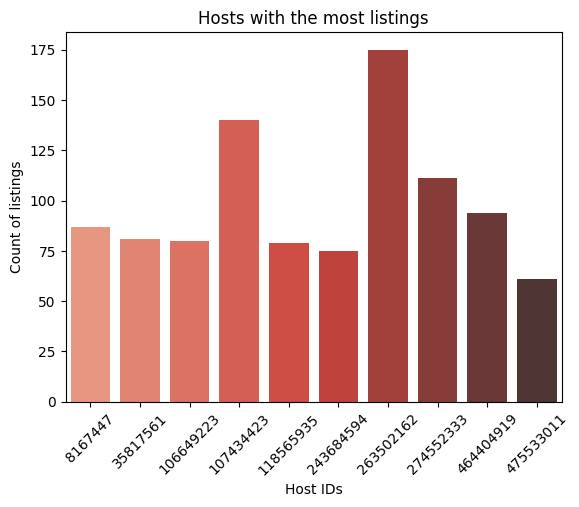

In [21]:
plt1=sns.barplot(x="host_id", y="listings_count", data=top_hosts_df,palette='Reds_d')
plt1.set_title('Hosts with the most listings')
plt1.set_ylabel('Count of listings')
plt1.set_xlabel('Host IDs')
plt1.set_xticklabels(plt1.get_xticklabels(), rotation=45)

In [22]:
df.room_type.value_counts()

Entire home/apt    12127
Private room        2443
Shared room          116
Hotel room             8
Name: room_type, dtype: int64

<Axes: xlabel='room_type', ylabel='count'>

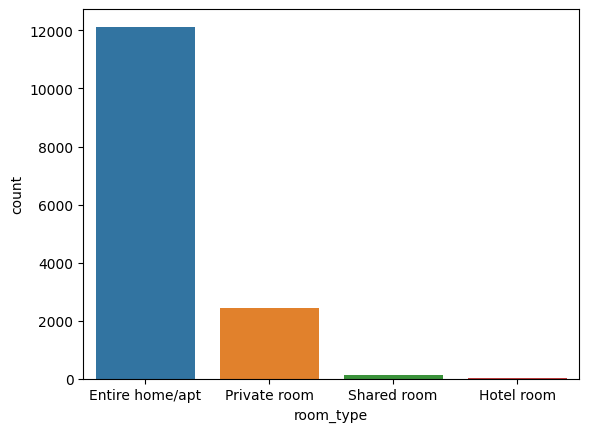

In [23]:
sns.countplot(x='room_type', data=df)

In [24]:
df.groupby(['room_type'])['price','minimum_nights','number_of_reviews','no_of_bedrooms'].agg([np.mean, np.min, np.max])

<ipython-input-24-831f6336fd8f>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(['room_type'])['price','minimum_nights','number_of_reviews','no_of_bedrooms'].agg([np.mean, np.min, np.max])
<ipython-input-24-831f6336fd8f>:1: FutureWarning: ['no_of_bedrooms'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df.groupby(['room_type'])['price','minimum_nights','number_of_reviews','no_of_bedrooms'].agg([np.mean, np.min, np.max])


price             minimum_nights             \
                       mean amin   amax           mean amin  amax   
room_type                                                           
Entire home/apt  289.813557    1  10450       7.575740    1  1124   
Hotel room       786.750000    0   3350       1.875000    1     3   
Private room     171.889889    5  20000       8.302906    1   730   
Shared room       67.663793   17    700      15.594828    1    31   

                number_of_reviews             
                             mean amin  amax  
room_type                                     
Entire home/apt         40.420219    0  1124  
Hotel room               0.875000    0     3  
Private room            22.015964    0   736  
Shared room             14.353448    0   639

# **Average Prices in Neighbourhoods**

In [25]:
df.neighbourhood.unique()

array([78702, 78705, 78729, 78704, 78756, 78741, 78746, 78745, 78725,
       78703, 78757, 78727, 78731, 78758, 78749, 78759, 78722, 78721,
       78701, 78733, 78754, 78723, 78752, 78751, 78736, 78737, 78724,
       78748, 78734, 78744, 78738, 78726, 78735, 78753, 78732, 78730,
       78728, 78739, 78717, 78750, 78747, 78712, 78719, 78742])

In [26]:
neighbourhood_prices = df.groupby(['neighbourhood','room_type'])["price"].mean().reset_index()
neighbourhood_prices = neighbourhood_prices.pivot(index="neighbourhood", columns="room_type", values="price")

In [27]:
neighbourhood_prices

room_type,Entire home/apt,Hotel room,Private room,Shared room
neighbourhood,,,,
78701,311.566061,298.5,1036.128788,294.000000
78702,304.637755,NaN,220.698492,151.500000
78703,388.379479,NaN,150.767857,64.500000
78704,310.643607,0.0,189.218391,260.000000
78705,213.209446,NaN,171.209091,78.846154
78712,1570.000000,NaN,500.000000,NaN
78717,187.090909,NaN,63.708333,NaN
78719,121.583333,NaN,76.000000,NaN
78721,227.813754,NaN,75.109091,NaN


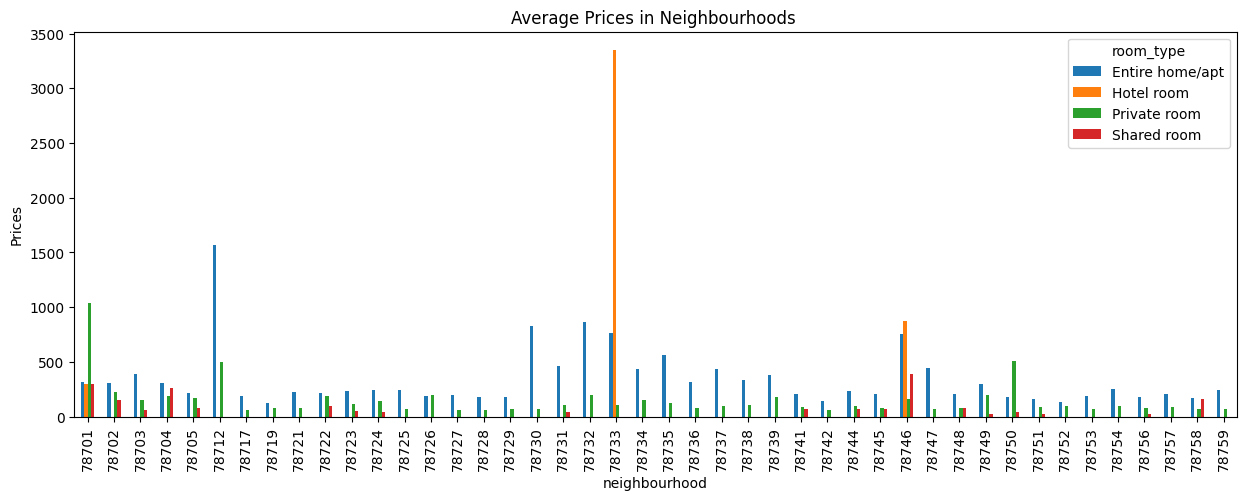

In [28]:
fig, ax = plt.subplots(figsize=(15,5))
neighbourhood_prices.plot(kind="bar", stacked = False, ax=ax, title="Average Prices in Neighbourhoods ", xlabel = "neighbourhood", ylabel = "Prices")
plt.show()

# **Total number of bedrooms on each room type**

In [29]:
bedrooms_in_rooms = pd.crosstab(df['room_type'], df['no_of_bedrooms'])
bedrooms_in_rooms

no_of_bedrooms,0 bedrooms,1 bedroom,2 bedrooms,3 bedrooms,4 bedrooms,5 bedrooms,6 bedrooms,7 bedrooms,8 bedrooms,9 bedrooms,Studio
room_type,,,,,,,,,,,
Entire home/apt,7,3912,3371,2468,1131,360,121,53,20,11,619
Hotel room,0,3,1,0,1,0,0,0,1,0,2
Private room,1,2122,180,50,30,2,0,0,0,0,57
Shared room,0,113,2,0,1,0,0,0,0,0,0


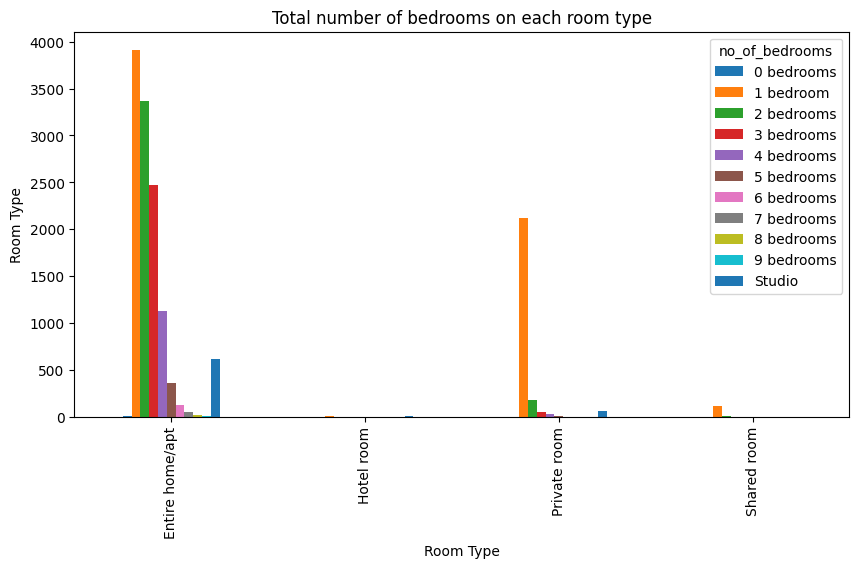

In [30]:
fig, ax = plt.subplots(figsize=(10,5))
bedrooms_in_rooms.plot(kind="bar", stacked = False, ax=ax, title="Total number of bedrooms on each room type", xlabel = "Room Type", ylabel = "Room Type")
plt.show()

# **Compareing Rates with Prices**

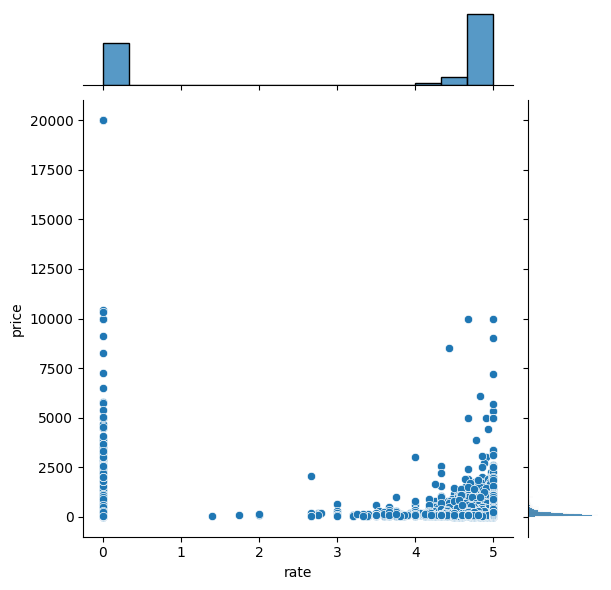

In [31]:
 sns.jointplot(x='rate', y='price', data=df, kind='scatter')

# **Compareing Rates with Number of Reviews**

In [32]:
df.columns

Index(['name', 'host_id', 'neighbourhood', 'latitude', 'longitude',
       'room_type', 'price', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'name_type', 'rate',
       'no_of_bedrooms', 'no_of_beds', 'no_of_baths'],
      dtype='object')

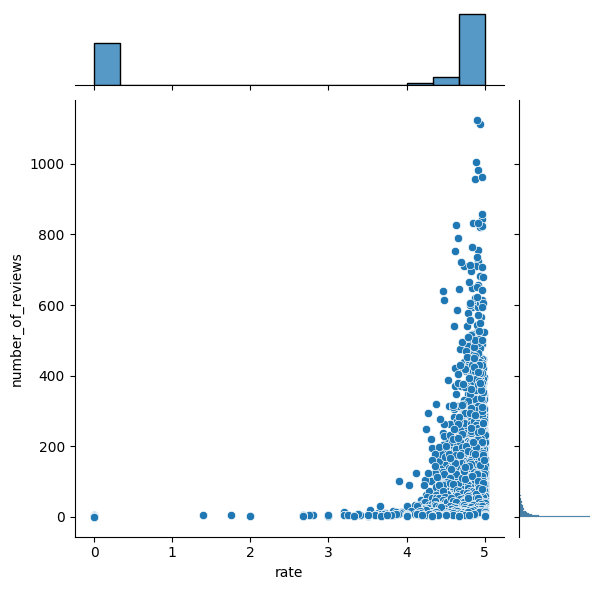

In [33]:
 sns.jointplot(x='rate', y='number_of_reviews', data=df, kind='scatter')

# **Check correlation**

<ipython-input-34-60c58fc9bbb1>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

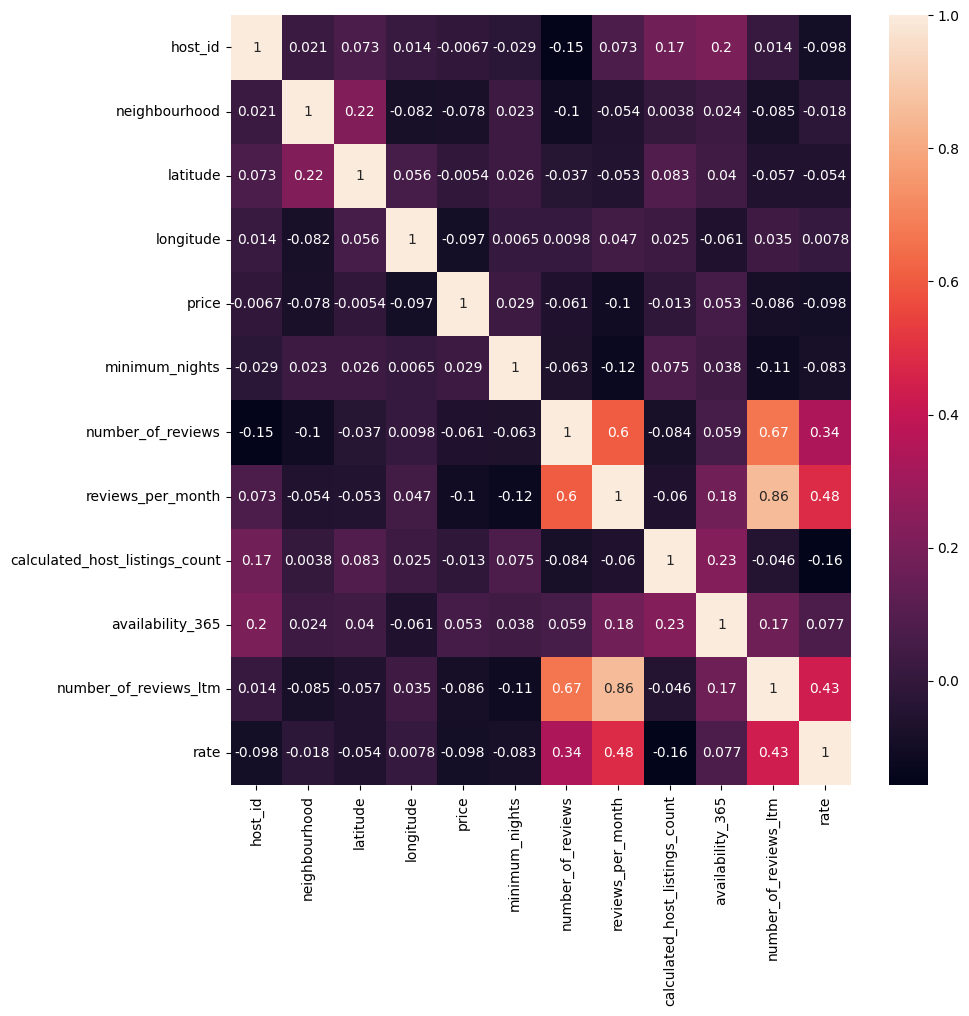

In [34]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

In [35]:
df.corr()

<ipython-input-35-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,host_id,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,rate
host_id,1.000000,0.020885,0.072704,0.014382,-0.006683,-0.029216,-0.151761,0.073489,0.173435,0.204757,0.013919,-0.098408
neighbourhood,0.020885,1.000000,0.217881,-0.082217,-0.078024,0.023483,-0.103896,-0.054156,0.003769,0.024040,-0.084697,-0.017776
latitude,0.072704,0.217881,1.000000,0.056020,-0.005408,0.026311,-0.036614,-0.053313,0.083406,0.039636,-0.057497,-0.053575
longitude,0.014382,-0.082217,0.056020,1.000000,-0.097369,0.006535,0.009753,0.046787,0.025261,-0.060668,0.035306,0.007849
price,-0.006683,-0.078024,-0.005408,-0.097369,1.000000,0.029317,-0.060638,-0.104940,-0.013399,0.053294,-0.085797,-0.097862
minimum_nights,-0.029216,0.023483,0.026311,0.006535,0.029317,1.000000,-0.062750,-0.124170,0.075131,0.038210,-0.112372,-0.082803
number_of_reviews,-0.151761,-0.103896,-0.036614,0.009753,-0.060638,-0.062750,1.000000,0.602247,-0.084181,0.058663,0.667923,0.336456
reviews_per_month,0.073489,-0.054156,-0.053313,0.046787,-0.104940,-0.124170,0.602247,1.000000,-0.059800,0.176830,0.858896,0.482566
calculated_host_listings_count,0.173435,0.003769,0.083406,0.025261,-0.013399,0.075131,-0.084181,-0.059800,1.000000,0.227609,-0.045766,-0.157523
availability_365,0.204757,0.024040,0.039636,-0.060668,0.053294,0.038210,0.058663,0.176830,0.227609,1.000000,0.166778,0.077465


In [36]:
df.columns

Index(['name', 'host_id', 'neighbourhood', 'latitude', 'longitude',
       'room_type', 'price', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'name_type', 'rate',
       'no_of_bedrooms', 'no_of_beds', 'no_of_baths'],
      dtype='object')

In [37]:
corr=df['latitude'].corr(df['longitude'])
corr

0.05602011573709395

In [38]:
top_reviewed_listings=df.nlargest(10,'number_of_reviews')
top_reviewed_listings

,name,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,name_type,rate,no_of_bedrooms,no_of_beds,no_of_baths
400,Camper/RV in Austin · ★4.90 · 1 bedroom · 1 be...,5152543,78723,30.29757,-97.68266,Entire home/apt,77,1,1124,8.97,2,337,85,Camper/RV,4.90,1 bedroom,1 bed,1 bath
331,Home in Austin · ★4.94 · 1 bedroom · 1 bed · 1...,740347,78704,30.24668,-97.75618,Entire home/apt,144,1,1113,9.49,2,329,101,Home,4.94,1 bedroom,1 bed,1 bath
626,Guesthouse in Austin · ★4.89 · 1 bedroom · 1 b...,5152543,78723,30.29736,-97.68232,Entire home/apt,88,1,1004,8.92,2,335,84,Guesthouse,4.89,1 bedroom,1 bed,1 bath
26,Guesthouse in Austin · ★4.92 · 1 bedroom · 3 b...,272156,78704,30.25756,-97.76995,Entire home/apt,99,1,982,6.48,2,318,100,Guesthouse,4.92,1 bedroom,1 bed,1 bath
906,Guesthouse in Austin · ★4.97 · 1 bedroom · 1 b...,3353143,78702,30.25622,-97.71446,Entire home/apt,109,2,962,9.43,2,57,100,Guesthouse,4.97,1 bedroom,1 bed,1 bath
115,Guesthouse in Austin · ★4.87 · 1 bedroom · 2 b...,989596,78704,30.24867,-97.74678,Entire home/apt,75,1,958,6.72,2,209,76,Guesthouse,4.87,1 bedroom,1 bed,1 bath
2024,Home in Austin · ★4.96 · 1 bedroom · 1 bed · 1...,3626574,78704,30.24455,-97.74532,Entire home/apt,183,1,857,9.99,4,265,92,Home,4.96,1 bedroom,1 bed,1 bath
217,Home in Austin · ★4.97 · 1 bedroom · 1 bed · 1...,3626574,78704,30.24654,-97.74713,Entire home/apt,193,1,845,6.55,4,253,78,Home,4.97,1 bedroom,1 bed,1 bath
61,Bungalow in Austin · ★4.85 · 1 bedroom · 1 bed...,1770424,78702,30.27871,-97.72332,Entire home/apt,119,1,833,6.09,8,329,86,Bungalow,4.85,1 bedroom,1 bed,1 bath
1410,Guest suite in Austin · ★4.91 · 2 bedrooms · 3...,72957,78744,30.19225,-97.73784,Entire home/apt,75,2,832,8.76,1,198,98,Guest suite,4.91,2 bedrooms,2 bed,1 bath


In [39]:
price_avrg=top_reviewed_listings.price.mean()
print('Average price per night: {}'.format(price_avrg))

Average price per night: 116.2
